# Introducción sobre el estudio estadístico

La relación entre el estilo de vida y el desempeño académico ha sido objeto de interés en los campos de la educación, la psicología y la salud desde hace décadas. Estudios pioneros en las décadas de 1970 y 1980 comenzaron a explorar cómo factores como las horas de estudio, el sueño y la participación en actividades extracurriculares afectan los logros académicos. Sin embargo, la creciente complejidad de las rutinas estudiantiles en el siglo XXI, marcada por demandas académicas más intensas, la influencia de la tecnología y la necesidad de equilibrar múltiples responsabilidades, ha renovado la importancia de investigar estas relaciones desde una perspectiva integral.

## El desafío moderno: un equilibrio cada vez más complejo

En la era digital, los patrones de estilo de vida estudiantil se han transformado profundamente. El acceso constante a dispositivos electrónicos, las redes sociales y las presiones sociales han incrementado los factores que compiten por la atención de los estudiantes. Esto plantea preguntas fundamentales sobre cómo los estudiantes actuales organizan su tiempo y cuáles de estas actividades tienen el impacto más significativo en su rendimiento académico. Además, con el aumento de problemas como la ansiedad y la depresión en estudiantes universitarios, comprender cómo los hábitos diarios afectan el bienestar es más relevante que nunca.

## El objetivo del presente estudio

Este estudio tiene como objetivo principal analizar los patrones de estilo de vida de los estudiantes y su relación con el desempeño académico, representado por su GPA (promedio de calificaciones). Al contar con $2000$ registros detallados de las actividades diarias de los estudiantes (incluyendo horas de estudio, actividades extracurriculares, horas de sueño, socialización y ejercicio físico), se busca:

Identificar los factores clave que predicen un alto rendimiento académico. Determinar cómo el estrés, derivado de la combinación de horas de estudio y sueño, influye en el desempeño. Explorar las interacciones entre actividades físicas, sociales y académicas, y su impacto en el bienestar general.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt # creating visualizations
import scipy # advanced scientific calculations

from statsmodels.stats.weightstats import ztest
import scipy.stats as st
from scipy.stats import norm, lognorm, gamma, expon, chi2

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-lifestyle-dataset/student_lifestyle_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/student-lifestyle-dataset/student_lifestyle_dataset.csv')

In [3]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [4]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


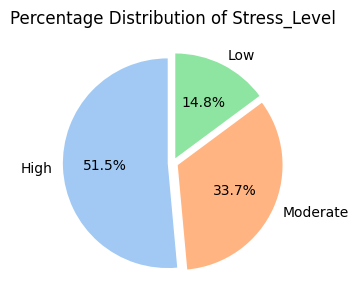

In [6]:
plt.subplot(1, 2, 2)
df['Stress_Level'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, explode=[0.05] * df['Stress_Level'].nunique())
plt.title(f'Percentage Distribution of Stress_Level')
plt.ylabel('')  

plt.tight_layout()
plt.show()

### Observaciones

1. El nivel de estrés más frecuente es *Alto*, con un $51.5\%$ de los estudiantes. Esto indica que más de la mitad de los estudiantes experimentan niveles altos de estrés, que pueden deberse a factores académicos, sociales o de estilo de vida.
2. El estrés *Moderado* es la segunda categoría más común, con un $33.7\%$ de los estudiantes. Esto refleja una parte significativa de los estudiantes que gestionan su estrés razonablemente bien.
3. Una proporción menor, el $14.8\%$, experimenta estrés *Bajo*. Esto indica que solo una minoría de los estudiantes tiene un estilo de vida equilibrado y libre de estrés.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

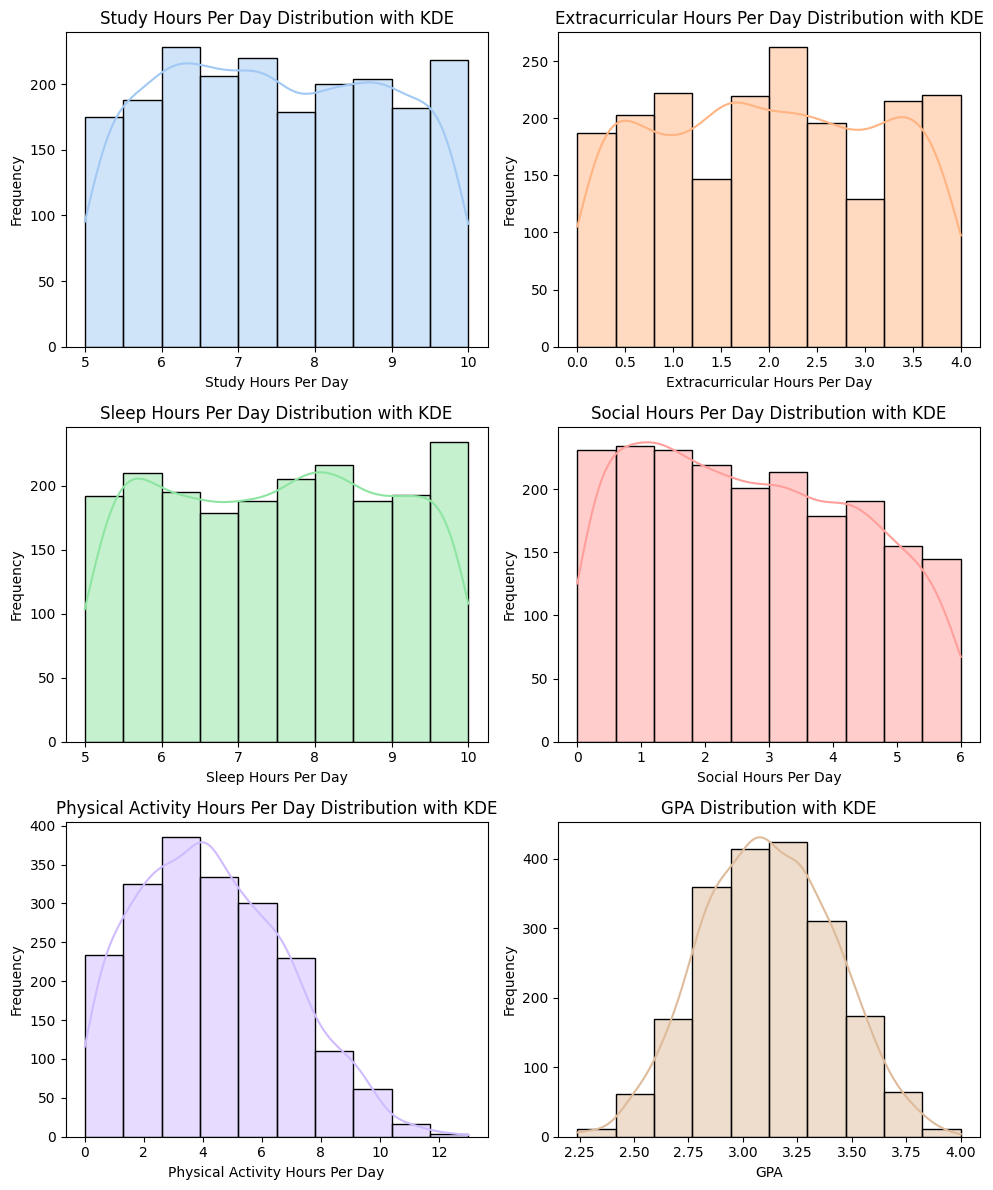

In [7]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    muted_colors = sns.color_palette("pastel", len(columns))
    
    for i, column in enumerate(columns):
        plt.subplot(3, 2, i + 1)  
        sns.histplot(data[column], kde=True, bins=10, color=muted_colors[i])
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 
                       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 
                       'Physical_Activity_Hours_Per_Day', 'GPA']

univariate_analysis(df, columns_to_analyze)

### Observaciones

1. **Study Hours Per Day:**
    * La distribución está ligeramente sesgada hacia la derecha: **la mayoría de los estudiantes estudian entre $6$ y $8$ horas.**
3. **Extracurricular Hours Per Day:**
    * Una distribución sesgada hacia la izquierda muestra que **la mayoría de los estudiantes pasan entre $0$ y $2$ horas diarias** en actividades extracurriculares.
5. **Sleep Hours Per Day:**
    * La distribución es casi normal, **centrada alrededor de $7$-$8$ horas por día**.
7. **Social Hours Per Day:**
    * La distribución está sesgada hacia la derecha: **la mayoría pasa entre $1$ y $3$ horas al día** socializando.
9. **Physical Activity Hours Per Day:**
    * Una distribución sesgada hacia la derecha muestra que la mayoría de los estudiantes **realizan entre $2$ y $5$ horas** de actividad física diariamente.
11. **GPA:**
    * El GPA sigue una distribución bastante normal, alcanzando un máximo entre $3.0$ y $3.2$.


## Visualizar la relación entre Study Hours y GPA

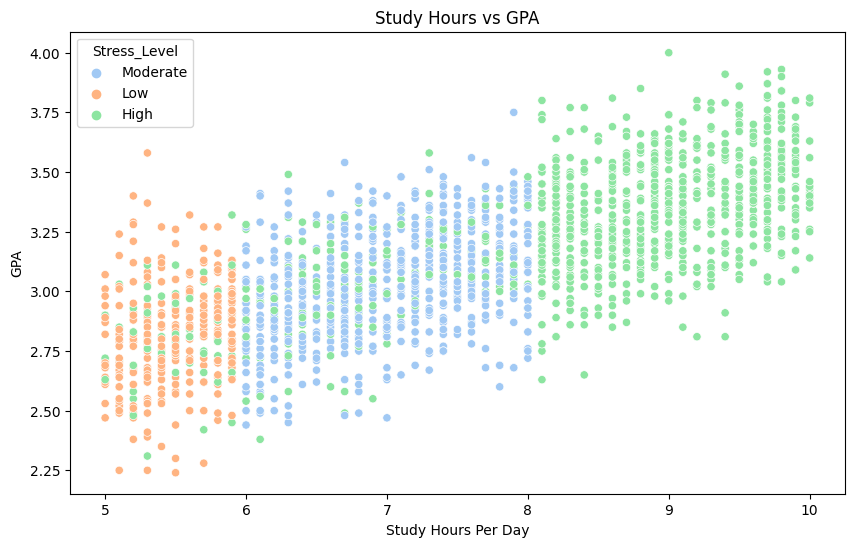

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', data=df, hue='Stress_Level', palette='pastel')
plt.title('Study Hours vs GPA')
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.show()

## Encontrar una distribución que ajuste con la variable estudiada

Intentar ajustar a varias distribuciones, para escoger la distribución que para seguir la variable estudiada (en este caso GPA). Se puede observar que la variable estudiada parece seguir una distribución normal.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


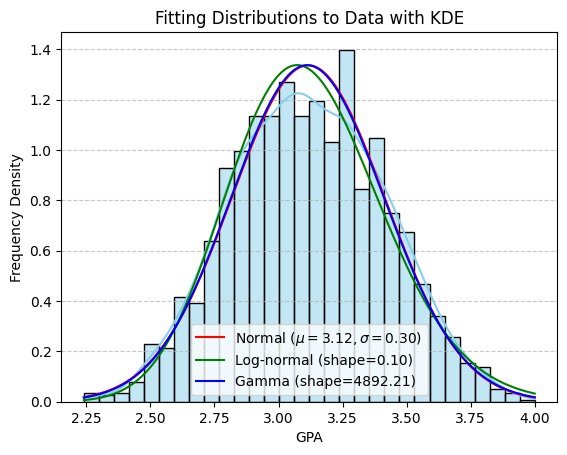

In [9]:
data = df['GPA']

sns.histplot(data, bins=30, kde=True, color='skyblue', stat='density')

# Testing various distributions
x = np.linspace(data.min(), data.max(), 1000)

# Fit Normal
mu, sigma = norm.fit(data)
pdf_norm = norm.pdf(x, mu, sigma)
plt.plot(x, pdf_norm, 'r-', label=f'Normal ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')

# Fit Log-normal
shape, loc, scale = lognorm.fit(data, floc=0)
pdf_lognorm = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognorm, 'g-', label=f'Log-normal (shape={shape:.2f})')

# Fit Gamma
shape, loc, scale = gamma.fit(data)
pdf_gamma = gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_gamma, 'b-', label=f'Gamma (shape={shape:.2f})')

plt.title('Fitting Distributions to Data with KDE')
plt.xlabel('GPA')
plt.ylabel('Frequency Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Prueba de Kolmogorov-Smirnov

Para asegurar que la variable puede seguir una distribución normal se realizará una **[Prueba de Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)**.

In [10]:
from scipy.stats import kstest

# Perform the KS test with the fitted normal distribution
ks_stat, p_value = kstest(data, 'norm', args=(mu, sigma))

print(f"KS statistic: {ks_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print('The null hypothesis is not rejected: the data may be normal.')
else:
    print('The null hypothesis is rejected: the data do not follow a normal distribution.')

KS statistic: 0.0258
p-value: 0.1376
The null hypothesis is not rejected: the data may be normal.


## Construir un intervalo de confianza del $90\%$ para los parámetros de la distribución.

### Intervalo de confianza para $\mu$

$$\mu \in [ \hat{X} - Z_{1 - \frac{\alpha}{2}} \frac{S
}{\sqrt{n}} ; \hat{X} + Z_{1 - \frac{\alpha}{2}} \frac{S}{\sqrt{n}} ]$$

In [11]:
alpha = 0.1
Z = norm.ppf(1 - alpha / 2)

N = len(data)
S = data.std()
X = data.mean()
SE = S / np.sqrt(N)

# Calculate limits
lower_bound = X - Z * SE
upper_bound = X + Z * SE

print('Confidence interval for mu:', f"[{lower_bound}, {upper_bound}]")

Confidence interval for mu: [3.1049747738228093, 3.1269452261771904]


### Intervalo de confianza para $\sigma^2$

$$\sigma^2 \in [\frac{(n-1)S^2}{\chi^2_{1 - \frac{\alpha}{2}}(n-1)}, \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}}(n-1)}]$$

In [12]:
N = len(data)
S_squared = data.var(ddof=1)

chi2_lower = chi2.ppf(1 - alpha / 2, df=N-1)
chi2_upper = chi2.ppf(alpha / 2, df=N-1)

lower_bound = (N - 1) * S_squared / chi2_upper
upper_bound = (N - 1) * S_squared / chi2_lower

print('Confidence interval for chi:', f"[{lower_bound}, {upper_bound}]")

Confidence interval for chi: [0.09404475385169156, 0.08474890213677717]


## Prueba de hipótesis

En este punto, es válido preguntarse si se puede afirmar que la media del GPA de los estudiantes excede $3.0$. Se utilizará un nivel de confianza del $95\%$.

Para afirmar si la media del GPA de los estudiantes excede $3.0$, podemos realizar una **prueba de hipótesis** para la media. Las hipótesis serán: $$H_0: \mu \le 3, \,\,\, H_1: \mu > 3$$
Como se desconoce la desviación poblacional, se utilizará la prueba de $\mu$ con varianza desconocida. Para ello se calculará el estadígrafo $t$:

$$t = \frac{\hat{X} - \mu_0}{S}\sqrt n$$

Como tenemos una muestra de tamaño $n > 30$ se puede usar para esta prueba una modificación en la Región Crítica cambiando el percentil de la t-Student por el percentil de la normal. $$RC = (Z_{1-\alpha}, \infty)$$

In [13]:
alpha = 0.05
Z = norm.ppf(1 - alpha)
mu_0 = 3

N = len(data)
S = data.std()
X = data.mean()
z = (X - mu_0) / S * np.sqrt(N)

if z > Z:
    print("We reject the null hypothesis: The mean GPA exceeds 3.")
else:
    print("We don't reject the null hypothesis: There is insufficient evidence to claim that the mean GPA exceeds 3.")

We reject the null hypothesis: The mean GPA exceeds 3.


## Análisis de datos sobre Stress Level vs. GPA en dos poblaciones

A continuación se realizará un análisis (comparación) de dos poblaciones, los estudiantes que tienen un nivel de estrés *Bajo* o *Moderado*, y los que tienen un nivel de estrés *Alto* para comparar sus resultados.

In [14]:
low_moderate = df[df['Stress_Level'].apply(lambda x: 'Low' in x or 'Moderate' in x)]['GPA']
high = df[df['Stress_Level'].apply(lambda x: 'High' in x)]['GPA']

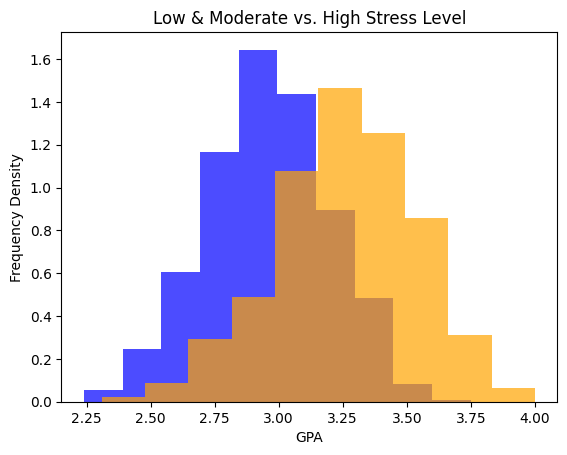

In [15]:
plt.hist(low_moderate, color='blue', alpha=0.7, density=True)
plt.hist(high, color='orange', alpha=0.7, density=True)
plt.title('Low & Moderate vs. High Stress Level')
plt.xlabel('GPA')
plt.ylabel('Frequency Density')
plt.show()

Aquí se puede observar que los estudiantes que tienen un nivel de estrés *Alto* tienden a tener un GPA más alto. A continuación, se realizará una prueba de hipótesis de estas dos poblaciones para justificar la respuesta.

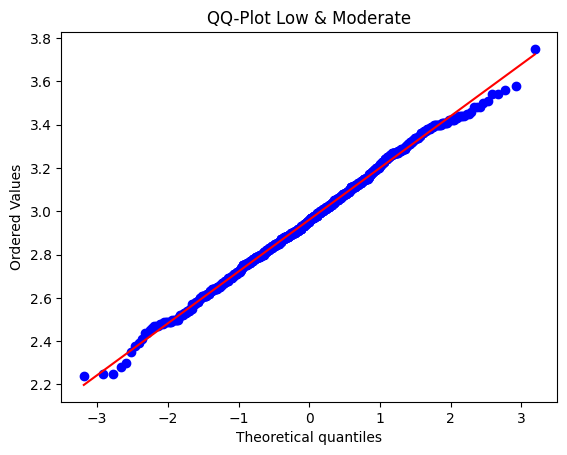

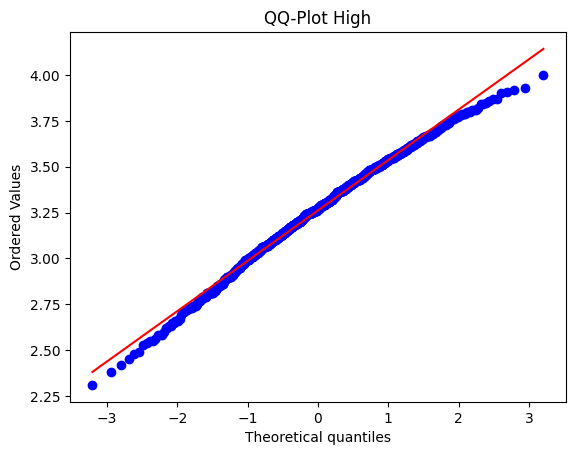

In [16]:
st.probplot(low_moderate, dist="norm", plot=plt)
plt.title("QQ-Plot Low & Moderate")
plt.show()

st.probplot(high,dist="norm", plot=plt)
plt.title("QQ-Plot High")
plt.show()

In [17]:
from scipy.stats import kstest

# Perform the KS test with the fitted normal distribution
ks_stat, p_value = kstest(low_moderate, 'norm', args=(low_moderate.mean(), low_moderate.std()))

print(f"KS statistic: {ks_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print('The null hypothesis is not rejected: the data may be normal.')
else:
    print('The null hypothesis is rejected: the data do not follow a normal distribution.')

KS statistic: 0.0237
p-value: 0.6392
The null hypothesis is not rejected: the data may be normal.


In [18]:
from scipy.stats import kstest

# Perform the KS test with the fitted normal distribution
ks_stat, p_value = kstest(high, 'norm', args=(high.mean(), high.std()))

print(f"KS statistic: {ks_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print('The null hypothesis is not rejected: the data may be normal.')
else:
    print('The null hypothesis is rejected: the data do not follow a normal distribution.')

KS statistic: 0.0357
p-value: 0.1418
The null hypothesis is not rejected: the data may be normal.


Realizando el KSTest se puede afirmar que los datos extraídos para ambas poblaciones pueden seguir una distribución normal.

In [19]:
lev_stat, p_value = st.levene(low_moderate, high)

print(f"Levene statistic: {lev_stat:.4f}")
print(f"p-value: {p_value:.4f}")

equal_var = p_value > 0.05

Levene statistic: 14.8018
p-value: 0.0001


In [20]:
t_stat, p_value = st.ttest_ind(low_moderate, high, equal_var=equal_var)

print(f"T statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: The students with 'High Stress Level' have a higher GPA than those with 'Low or Moderate Stress Level'.")
else:
    print("We don't reject the null hypothesis: There is insufficient evidence to claim that the students with High Stress Level have a higher GPA than those with Low or Moderate Stress Level.")

T statistic: -26.1461
p-value: 0.0000
We reject the null hypothesis: The students with 'High Stress Level' have a higher GPA than those with 'Low or Moderate Stress Level'.


Con lo mostrado anteriormente se puede afirmar la hipótesis de que los estudiantes que tienen un nivel de estrés *Alto* tienden a tener un GPA más alto.